In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
main_df = pd.read_csv("Latest Covid-19 India Status.csv")
df = main_df.copy()
df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


In [4]:
df.Active.value_counts()

0       14
1        4
5        3
3        2
4        2
14       1
27       1
12       1
18       1
214      1
59       1
1233     1
2        1
8        1
57       1
135      1
Name: Active, dtype: int64

In [5]:
df.shape

(36, 9)

In [6]:
# Getting list of all columns present in the dataframe
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.replace('Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu')

df.head(10)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376
5,Chandigarh,100693,0,99508,1185,0.0,98.82,1.18,30501026
6,Chhattisgarh,1187695,0,1173505,14190,0.0,98.81,1.19,28900667
7,Daman and Diu,11592,0,11588,4,0.0,99.97,0.03,231502578
8,Delhi,2040910,14,2014230,26666,0.0,98.69,1.31,773997
9,Goa,263346,3,259329,4014,0.0,98.47,1.52,3772103


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [10]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.249975e+06,50.333333,1.235146e+06,14778.527778,0.005000,98.897222,1.097778,3.971861e+07
std,1.846038e+06,207.118048,1.820328e+06,27221.140636,0.026673,0.506854,0.494791,5.050913e+07
min,1.076600e+04,0.000000,1.063700e+04,4.000000,0.000000,97.410000,0.030000,6.600100e+04
25%,1.065430e+05,0.000000,1.055395e+05,1124.250000,0.000000,98.690000,0.840000,1.695473e+06
50%,6.140910e+05,1.500000,6.076750e+05,6551.000000,0.000000,98.935000,1.065000,2.410088e+07
75%,1.331951e+06,9.000000,1.322329e+06,14325.750000,0.000000,99.160000,1.310000,6.979986e+07
max,8.171048e+06,1233.000000,8.022276e+06,148558.000000,0.160000,99.970000,2.440000,2.315026e+08


In [11]:
df.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

<AxesSubplot:>

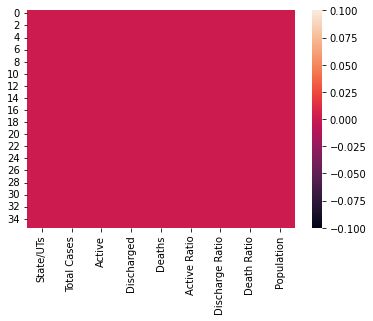

In [12]:
sns.heatmap(df.isnull())

In [13]:
df1 = df.drop('State/UTs' , axis = 1)

df1.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
Total Cases,1.000000,0.091469,0.999988,0.944591,-0.044274,-0.113942,0.118865,-0.067049
Active,0.091469,1.000000,0.089881,0.184970,0.980640,-0.529588,0.492912,-0.054090
Discharged,0.999988,0.089881,1.000000,0.942957,-0.045396,-0.111749,0.116673,-0.066251
Deaths,0.944591,0.184970,0.942957,1.000000,0.025756,-0.250229,0.255081,-0.116254
Active Ratio,-0.044274,0.980640,-0.045396,0.025756,1.000000,-0.501512,0.463513,-0.009301
Discharge Ratio,-0.113942,-0.529588,-0.111749,-0.250229,-0.501512,1.000000,-0.999043,0.162089
Death Ratio,0.118865,0.492912,0.116673,0.255081,0.463513,-0.999043,1.000000,-0.164450
Population,-0.067049,-0.054090,-0.066251,-0.116254,-0.009301,0.162089,-0.164450,1.000000


<AxesSubplot:>

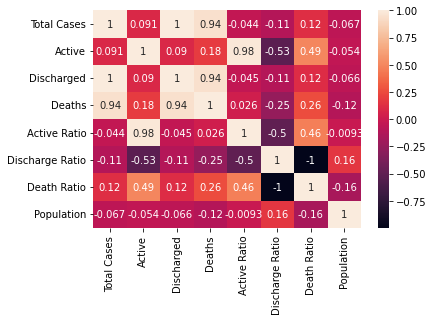

In [14]:
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='Total Cases', ylabel='State/UTs'>

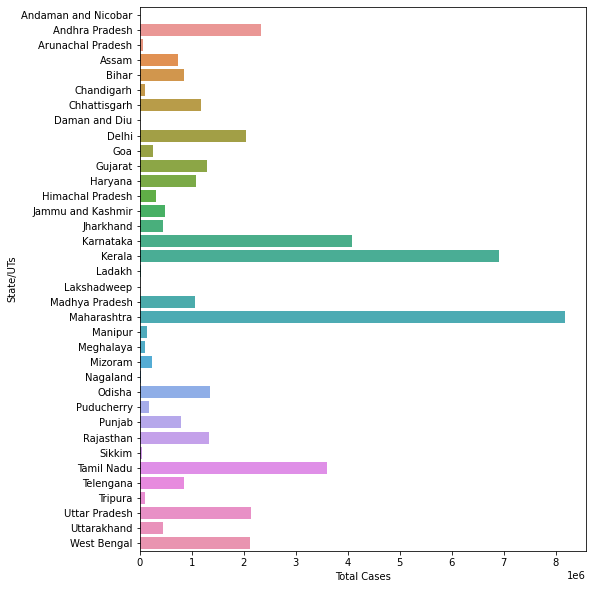

In [15]:
plt.figure(figsize=(8,10))
sns.barplot(data=df, y = "State/UTs", x="Total Cases")

In [16]:
px.bar(df, x="State/UTs", y="Total Cases", color="Death Ratio", title="Total Cases as per each State : ")

In [17]:
px.scatter(df, x = 'Active Ratio', y='Death Ratio', color = df['State/UTs'])

In [18]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UTs',
    color='Total Cases',
    color_continuous_scale='Blues'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [19]:
fig = px.choropleth(
    df,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='State/UTs',
    color='Deaths',
    color_continuous_scale='Greens'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

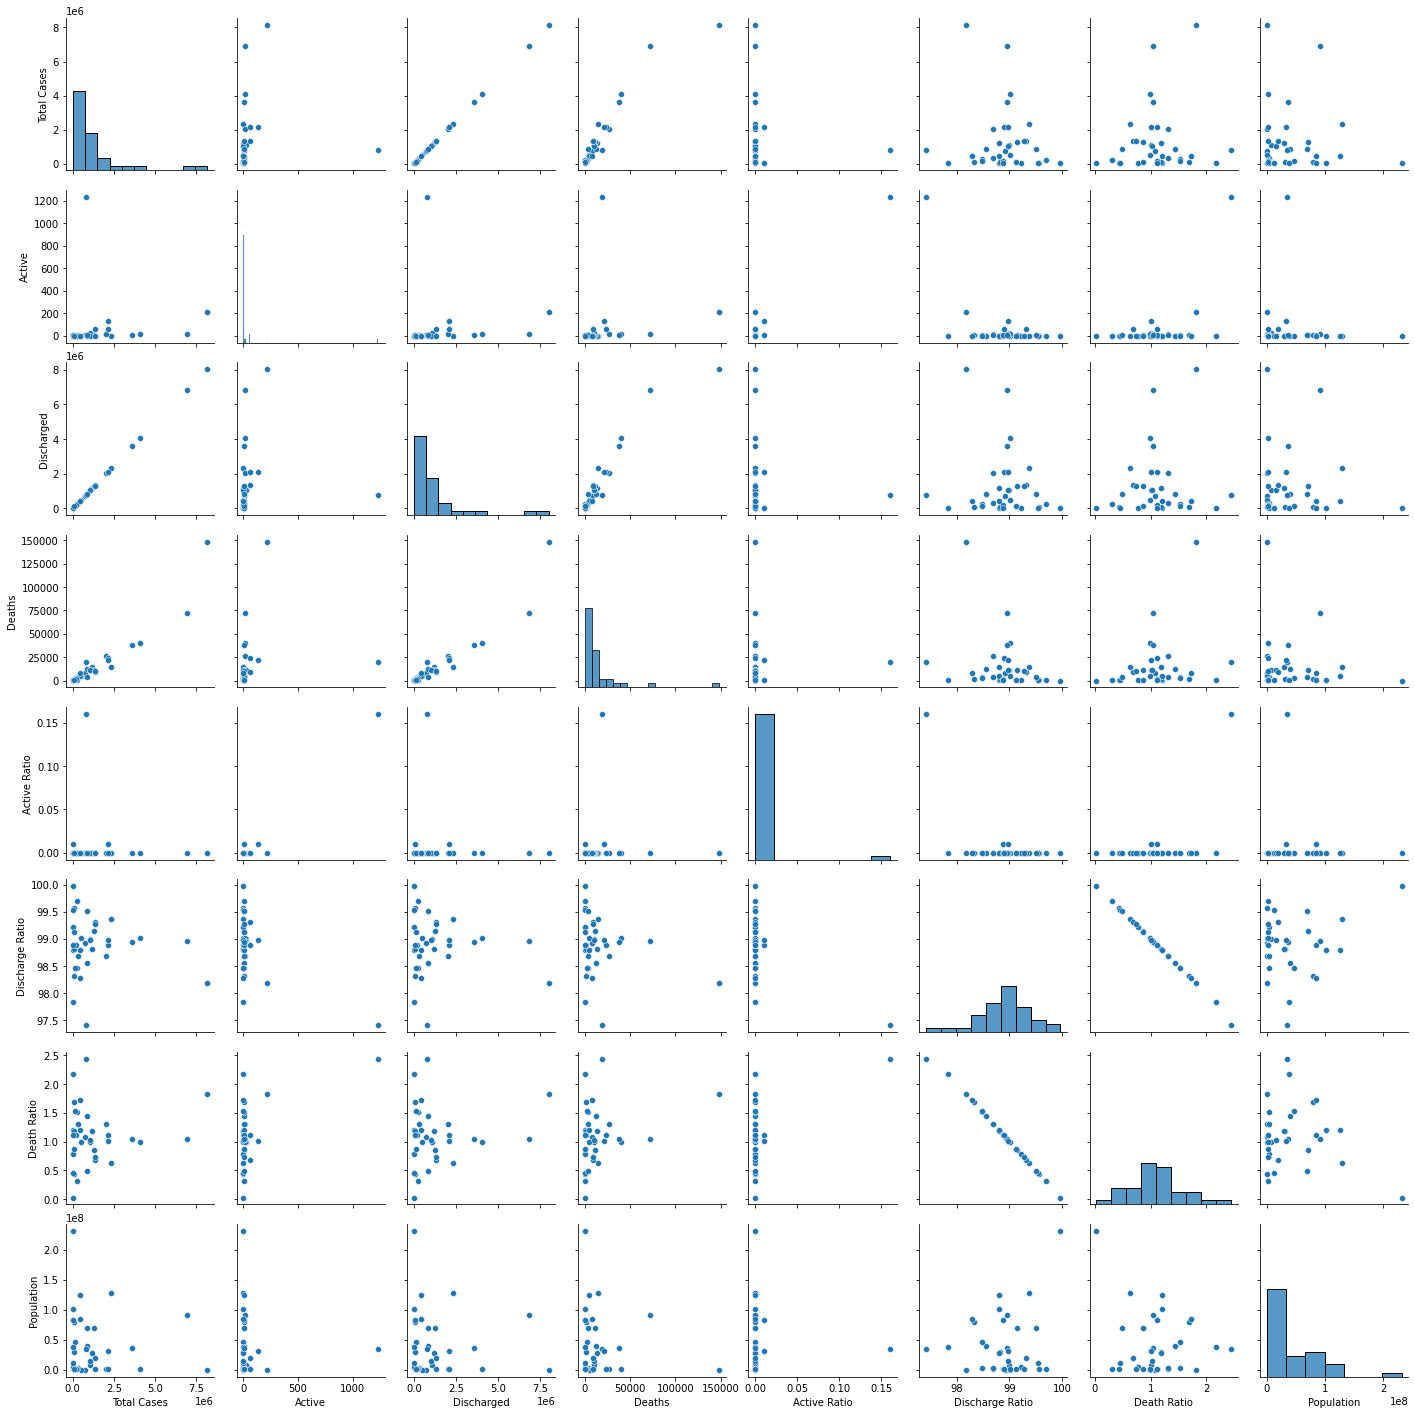

In [20]:
sns.pairplot(df)

In [21]:
px.density_heatmap(df, y="Total Cases", x="State/UTs", nbinsx=20, nbinsy=20)

In [22]:
px.density_heatmap(df, y="Total Cases", x="State/UTs", marginal_x="histogram", marginal_y="histogram")

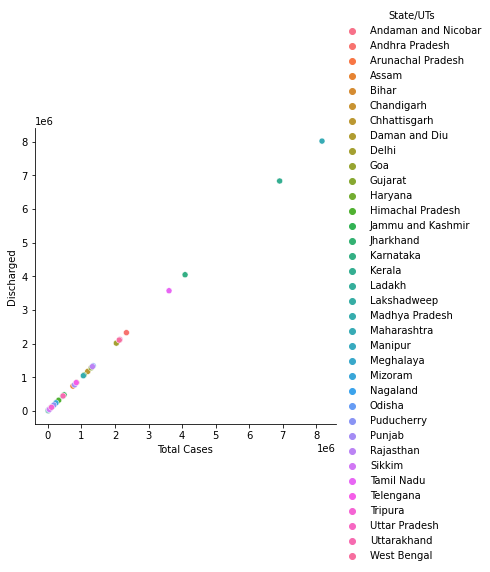

In [23]:
sns.relplot(x = 'Total Cases', y ='Discharged', hue = 'State/UTs', data = df)

In [24]:
fig = px.scatter_matrix(df, dimensions=["Total Cases", "Active", "Discharged", "Deaths"], color=df['State/UTs'])
fig.show()

In [25]:
fig = px.scatter(df, x="Total Cases", y="Active", size="Deaths", color=df['State/UTs'], log_x=True, size_max=50)
fig.show()

In [26]:
px.scatter(df, x="Total Cases", y="Active",size="Active Ratio", color="Active Ratio",hover_name="State/UTs", log_x=True, size_max=60)

In [27]:
fig = px.pie(df, values='Total Cases', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

In [28]:
df.nunique()

State/UTs          36
Total Cases        36
Active             16
Discharged         36
Deaths             36
Active Ratio        3
Discharge Ratio    30
Death Ratio        32
Population         36
dtype: int64

In [29]:
fig = px.pie(df, values='Discharge Ratio', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

In [30]:
fig = px.pie(df, values='Death Ratio', names=df['State/UTs'], title='Covid cases (%) in all states of India')
fig.show()

In [31]:
fig = px.scatter (df, x = "Active", y = "Deaths", template = "plotly_dark",  trendline="ols")
fig.show ()

In [32]:
# State having highest number of covid cases in India.

highest_cases = df[df['Total Cases'] == max(df['Total Cases'])]
highest_cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
20,Maharashtra,8171048,214,8022276,148558,0.0,98.18,1.82,399001


In [33]:
# State having Lowest number of covid cases in India.

lowest_cases = df[df['Total Cases'] == min(df['Total Cases'])]
lowest_cases

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.8,1.2,100896618


In [34]:
# State having highest number of Active cases in India.

highest_active = df[df['Active'] == max(df['Active'])]
highest_active

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
27,Punjab,793644,1233,773073,19338,0.16,97.41,2.44,34698876


In [35]:
# State having Lowest number of Active cases in India.

lowest_active = df[df['Active'] == min(df['Active'])]
lowest_active

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
5,Chandigarh,100693,0,99508,1185,0.0,98.82,1.18,30501026
6,Chhattisgarh,1187695,0,1173505,14190,0.0,98.81,1.19,28900667
7,Daman and Diu,11592,0,11588,4,0.0,99.97,0.03,231502578
13,Jammu and Kashmir,482023,0,477231,4792,0.0,99.01,0.99,66001
17,Ladakh,29602,0,29371,231,0.0,99.22,0.78,4184959
18,Lakshadweep,11415,0,11363,52,0.0,99.54,0.46,11700099
19,Madhya Pradesh,1056351,0,1045565,10786,0.0,98.98,1.02,14999397


In [36]:
# State having highest number of death ratio in India.

highest_death_ratio = df[df['Death Ratio'] == max(df['Death Ratio'])]
highest_death_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
27,Punjab,793644,1233,773073,19338,0.16,97.41,2.44,34698876


In [37]:
# State having lowest number of death ratio in India.

lowest_death_ratio = df[df['Death Ratio'] == min(df['Death Ratio'])]
lowest_death_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
7,Daman and Diu,11592,0,11588,4,0.0,99.97,0.03,231502578


In [38]:
# State having highest discharge ratio in India.

highest_discharge_ratio = df[df['Discharge Ratio'] == max(df['Discharge Ratio'])]
highest_discharge_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
7,Daman and Diu,11592,0,11588,4,0.0,99.97,0.03,231502578


In [39]:
# State having lowest discharge ratio in India.

lowest_discharge_ratio = df[df['Discharge Ratio'] == min(df['Discharge Ratio'])]
lowest_discharge_ratio

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
27,Punjab,793644,1233,773073,19338,0.16,97.41,2.44,34698876


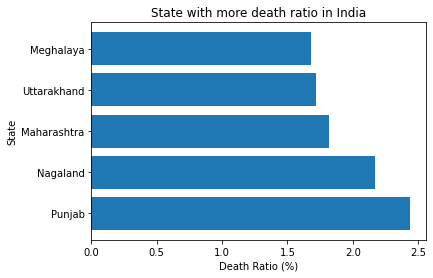

In [40]:
# Visualization of top 5 state having highest Death ratio in India.
df2 = df.sort_values(by='Death Ratio', ascending=False).head()
states = df2['State/UTs']
ratio = df2['Death Ratio']
plt.barh(states, ratio)
plt.xlabel('Death Ratio (%)')
plt.ylabel('State')
plt.title('State with more death ratio in India')
plt.show()

In [41]:
df2

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
27,Punjab,793644,1233,773073,19338,0.16,97.41,2.44,34698876
24,Nagaland,36033,0,35251,782,0.00,97.83,2.17,38157311
20,Maharashtra,8171048,214,8022276,148558,0.00,98.18,1.82,399001
34,Uttarakhand,452571,0,444803,7768,0.00,98.28,1.72,85002417
22,Meghalaya,96983,3,95352,1628,0.00,98.32,1.68,79502477
